## Resampling for Classification on Synthetic Data

The below code demonstrates the standard application of resampling.

2,500 observations are generated with two features using the sklearn make_classification function. Event non-occurence (class = 0) is set to 99% and event occurence (class = 1) to 1%, creating an imbalanced dataset.

The initial unsampled model shows high accuracy but poor sensitivity, meaning most of the class = 1 outcomes are false negatives (class = 0) with only 2 true positives.

By oversampling the minority class using SMOTE a more senstive model is estimated with better class = 1 performance. This increased senstivity rate comes at the cost of slightly worse accuracy due to more false positives.



Unsampled confusion matrix:
 [[2463    0]
 [  35    2]]

Resampled confusion matrix:
 [[2238  225]
 [  16   21]]

            accuracy  specificity  sensitivity  TP  FN
Unsampled    0.9860     1.000000     0.054054   2  35
Resampled    0.9036     0.908648     0.567568  21  16


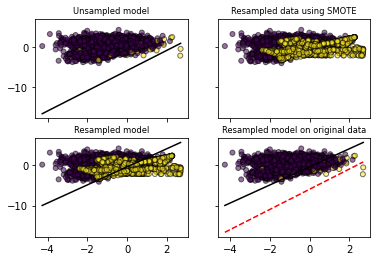

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X1, Y1 = make_classification(random_state=12223,
                             n_samples=2500,n_features=2, n_redundant=0, n_informative=2,
                             weights = [0.99,0.01], n_clusters_per_class=2)


XR, YR = SMOTE(sampling_strategy=1/2).fit_resample(X1, Y1)

clf = LogisticRegression()
clf.fit(X1, Y1)
w = clf.coef_[0]
a = -w[0] / w[1]
xx1 = np.linspace(np.min(X1[:, 0]), np.max(X1[:, 0]))
yy1 = a * xx1 - (clf.intercept_[0]) / w[1]
d = {}
print('\nUnsampled confusion matrix:\n',confusion_matrix(Y1, clf.predict(X1)))
tn, fp, fn, tp = confusion_matrix(Y1, clf.predict(X1)).ravel()
r = {}
r['accuracy'] = (tp+tn)/(tp+tn+fp+fn)
r['specificity'] = tn/(tn+fp)
r['sensitivity'] = tp/(tp+fn)
r['TP'] = tp
r['FN'] = fn
d['Unsampled'] = r

clf.fit(XR, YR)
# Decision boundary - solve for where linear equation equals zero since zero log-odds means 50%-50% probability
w = clf.coef_[0]
a = -w[0] / w[1]
xxr = np.linspace(np.min(X1[:, 0]), np.max(X1[:, 0]))
yyr = a * xxr - (clf.intercept_[0]) / w[1]
print('\nResampled confusion matrix:\n',confusion_matrix(Y1, clf.predict(X1)))
tn, fp, fn, tp = confusion_matrix(Y1, clf.predict(X1)).ravel()
r = {}
r['accuracy'] = (tp+tn)/(tp+tn+fp+fn)
r['specificity'] = tn/(tn+fp)
r['sensitivity'] = tp/(tp+fn)
r['TP'] = tp
r['FN'] = fn
d['Resampled'] = r

%matplotlib inline
fig,ax = plt.subplots(2,2,sharex=True, sharey=True)
ax[0,0].scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, alpha=0.55, edgecolor='k')
ax[0,0].plot(xx1,yy1,'k-')
ax[0,0].set_title('Unsampled model',fontsize='small')
ax[0,1].scatter(XR[:, 0], XR[:, 1], marker='o', c=YR, s=25, alpha=0.55, edgecolor='k')
ax[0,1].set_title('Resampled data using SMOTE',fontsize='small')
ax[1,0].scatter(XR[:, 0], XR[:, 1], marker='o', c=YR, s=25, alpha=0.55, edgecolor='k')
ax[1,0].plot(xxr,yyr,'k-')
ax[1,0].set_title('Resampled model',fontsize='small')
ax[1,1].scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, alpha=0.55, edgecolor='k')
ax[1,1].plot(xxr,yyr,'k-')
ax[1,1].plot(xx1,yy1,'r--')
ax[1,1].set_title('Resampled model on original data',fontsize='small')
print('\n',pd.DataFrame.from_dict(d,orient='index'))